# MIT 6.867 Final Project: Variable Importance
Irina Degtiar


In [1]:
##########################################################################################################
### Set up workspace
##########################################################################################################
# Ensure re-load of all code
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import libraries - general
import numpy as np
import pylab as pl
import pandas as pd
import random
import sklearn.metrics

# Variable importance
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
##########################################################################################################
### Load data
##########################################################################################################
data = pd.read_csv('../Data/2_Cleaned/trainset_1120.csv')
X_df = data.drop(data.columns[[0, 1]], axis=1)
x = np.array(X_df)
y = data['target']
y = np.array(y)

In [4]:
### Separate into training/validation data
random.seed(867)
train_index = np.random.choice(range(data.shape[0]),int(0.8*data.shape[0]))
validate_index=set(range(data.shape[0]))-set(train_index)
validate_index=np.array(list(validate_index),dtype='int64')

x_train = x[train_index,:]
x_validate = x[validate_index,:]
y_train = y[train_index]
y_validate = y[validate_index]

In [6]:
### Case-control sampling
case_index = [i for i,t in enumerate(y_train) if t == 1]
control_index = [i for i,t in enumerate(y_train) if t == 0]

new_control_index = np.random.choice(control_index,4*len(case_index))
new_index = np.concatenate((new_control_index,case_index))

new_x_train = x_train[new_index,:]
new_y_train = y_train[new_index]

In [7]:
# Run LARS
print("Computing regularization path using the LARS ...")
from sklearn import linear_model
alphas, _, coefs = linear_model.lars_path(new_x_train, new_y_train, method='lasso', verbose=True)



Computing regularization path using the LARS ...
.

C:\USERS\IDEGTIAR\ANACONDA3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 347 iterations, alpha=2.210e-03, previous alpha=3.893e-05, with an active set of 258 regressors.
  ConvergenceWarning)


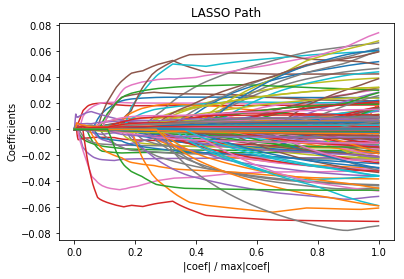

In [12]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html
# Plot results
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

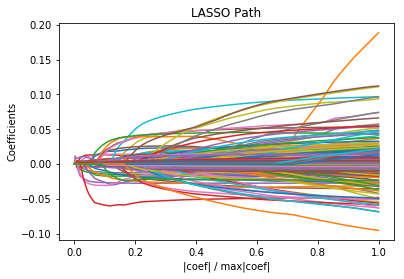

In [14]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html
# Plot results
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [82]:
# Top 10 variables
i = 10
print('|coef| / max|coef|',xx[i])
print('Nonzero features:',sum(abs(coefs.T[i])>0))
print("Nonzero columns: ")
print(X_df.iloc[:,abs(coefs.T[i])>0].columns.values)
X_df.iloc[:,abs(coefs.T[i])>0].head()

|coef| / max|coef| 0.000667814319893
Nonzero features: 10
Nonzero columns: 
['d.2' 'd.14' 'd.16' 'd.20' 'd.25' 'd.37' 'd.38' 'd.41' 'd.45' 'd.58']


,d.2,d.14,d.16,d.20,d.25,d.37,d.38,d.41,d.45,d.58
0,24,64,32,16,16,32,40,16,9.979980,8
1,18,45,20,35,27,36,45,63,6.194655,28
2,0,56,49,98,32,56,24,112,4.737088,98
3,0,32,28,24,40,56,56,48,12.154012,42
4,10,80,64,88,30,80,0,110,12.023415,88


In [81]:
# Top 30 variables
i=60
print('|coef| / max|coef|',xx[i])
print('Nonzero features:',sum(abs(coefs.T[i])>0))
print("Nonzero columns: ")
print(X_df.iloc[:,abs(coefs.T[i])>0].columns.values)
X_df.iloc[:,abs(coefs.T[i])>0].head()

|coef| / max|coef| 0.0149541379445
Nonzero features: 30
Nonzero columns: 
['ps_ind_06_bin' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_car_14'
 'ps_calc_08' 'd.4' 'd.8' 'd.13' 'd.15' 'd.17' 'd.21' 'd.24' 'd.28' 'd.37'
 'd.38' 'd.41' 'd.42' 'd.43' 'd.44' 'd.45' 'd.47' 'd.50' 'd.57' 'd.59'
 'd.60' 'd.65' 'd.81' 'd.82' 'd.83']


,ps_ind_06_bin,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_car_14,ps_calc_08,d.4,d.8,d.13,d.15,...,d.45,d.47,d.50,d.57,d.59,d.60,d.65,d.81,d.82,d.83
0,1,0.197425,1,1,-1.454271,-0.839849,12,6,16,16,...,9.979980,10,4,12,3.286587,3.6,10,1.643293,1.8,2.0
1,-1,0.197425,1,1,-0.250646,-0.154764,8,14,15,20,...,6.194655,20,28,8,2.240720,0.4,35,3.921260,0.7,1.4
2,1,0.197425,1,1,-1.217854,-0.839849,0,0,28,7,...,4.737088,3,14,28,5.971316,0.7,42,11.942631,1.4,2.8
3,1,1.325443,1,1,0.589447,-0.839849,0,0,20,12,...,12.154012,21,18,42,7.535403,5.6,42,6.458917,4.8,7.8
4,-1,-0.084579,1,1,-0.259799,0.530322,8,11,24,16,...,12.023415,0,22,24,5.740850,7.2,0,7.893668,9.9,9.9


In [85]:
# Top 50 variables
i=102
print('|coef| / max|coef|',xx[i])
print('Nonzero features:',sum(abs(coefs.T[i])>0))
print("Nonzero columns: ")
print(X_df.iloc[:,abs(coefs.T[i])>0].columns.values)
X_df.iloc[:,abs(coefs.T[i])>0].head()

|coef| / max|coef| 0.045300687214
Nonzero features: 50
Nonzero columns: 
['ps_ind_01' 'ps_ind_03' 'ps_ind_04_cat' 'ps_ind_06_bin' 'ps_ind_09_bin'
 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_car_03_cat'
 'ps_car_07_cat' 'ps_car_11' 'ps_car_12' 'ps_car_14' 'ps_calc_06'
 'ps_calc_08' 'ps_ind_05_cat_0' 'ps_car_01_cat_7' 'd.4' 'd.8' 'd.13' 'd.14'
 'd.17' 'd.20' 'd.21' 'd.22' 'd.24' 'd.25' 'd.27' 'd.30' 'd.36' 'd.37'
 'd.38' 'd.40' 'd.42' 'd.43' 'd.45' 'd.50' 'd.55' 'd.56' 'd.57' 'd.58'
 'd.59' 'd.60' 'd.63' 'd.65' 'd.66' 'd.76' 'd.81' 'd.82' 'd.83']


,ps_ind_01,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_09_bin,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_car_03_cat,ps_car_07_cat,...,d.58,d.59,d.60,d.63,d.65,d.66,d.76,d.81,d.82,d.83
0,-0.957954,-0.156790,1,1,1,0.197425,1,1,1,1,...,8,3.286587,3.6,20,10,4.108234,6,1.643293,1.8,2.0
1,-0.453868,-0.897558,-1,-1,1,0.197425,1,1,-1,1,...,28,2.240720,0.4,5,35,2.800900,14,3.921260,0.7,1.4
2,-0.957954,0.583977,-1,1,-1,0.197425,1,1,1,1,...,98,5.971316,0.7,3,42,2.559135,56,11.942631,1.4,2.8
3,0.554304,0.954361,1,1,1,1.325443,1,1,-1,1,...,42,7.535403,5.6,7,42,7.535403,36,6.458917,4.8,7.8
4,-0.957954,-1.267942,-1,-1,1,-0.084579,1,1,1,1,...,88,5.740850,7.2,0,0,0.000000,33,7.893668,9.9,9.9


All top 10 variables are interaction variables. With 30 covariates, 6 are non-interaction terms; with 50 covariates, 17 are non-interaction terms.

In [87]:
# ### Neural network feature importance
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
#        beta_1=0.9, beta_2=0.999, early_stopping=False,
#        epsilon=1e-08, hidden_layer_sizes=(100,50,25), learning_rate='constant',
#        learning_rate_init=0.001, max_iter=200, momentum=0.9,
#        nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
#        solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
#        warm_start=False)

# clf.fit(new_x_train, new_y_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [89]:
### Random forest feature importance
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(new_x_train, new_y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

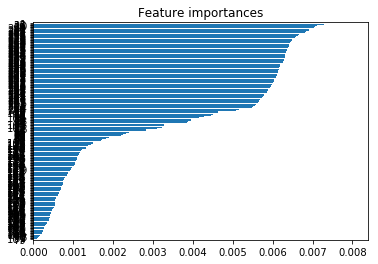

In [102]:
### Plot feature importance
# https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices])#,
       #color="r")#, xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [101]:
feat_labels = X_df.columns
indices = np.argsort(forest.feature_importances_)[::-1]

for f in range(X_df.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_ind_03                      0.007995
 2) ps_ind_15                      0.007471
 3) ps_car_13                      0.007283
 4) ps_ind_01                      0.007112
 5) ps_calc_01                     0.007105
 6) ps_calc_03                     0.007055
 7) d.87                           0.007050
 8) ps_calc_02                     0.007038
 9) ps_car_14                      0.006978
10) d.21                           0.006922
11) d.42                           0.006916
12) d.85                           0.006880
13) ps_car_15                      0.006841
14) ps_calc_04                     0.006799
15) d.59                           0.006789
16) d.24                           0.006668
17) d.81                           0.006667
18) d.45                           0.006627
19) d.66                           0.006590
20) ps_reg_03                      0.006580
21) d.14                           0.006552
22) d.9                            0.006523
23) ps_car_12                   